## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


## Loading of data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train.shape

(7352, 563)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [6]:
train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

## Data Preprocessing

#### 1.Checking Duplicates

In [7]:
print("The number of duplicates in train data:",sum(train.duplicated()))
print("The number of duplicates in test data:",sum(test.duplicated()))

The number of duplicates in train data: 0
The number of duplicates in test data: 0


#### 2.Checking Null Values

In [8]:
print("Null values in train data:",train.isnull().values.sum())
print("Null values in test data:",test.isnull().values.sum())

Null values in train data: 0
Null values in test data: 0


#### 2.Checking class Imbalance

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'LAYING'),
  Text(1, 0, 'STANDING'),
  Text(2, 0, 'SITTING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_UPSTAIRS'),
  Text(5, 0, 'WALKING_DOWNSTAIRS')])

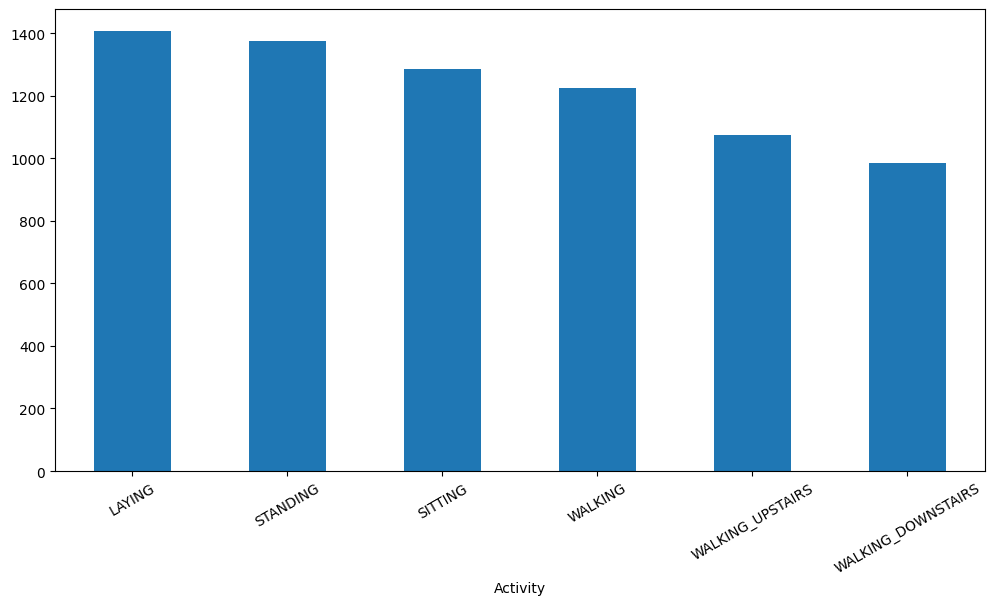

In [9]:
plt.figure(figsize=(12,6))
train.groupby('Activity').size().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=30)

#### 4.Exploratory Data Analysis

In [10]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [11]:

pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns])
                       ,orient='index')
   
    

,0
tBodyAcc,40
tGravityAcc,40
tBodyAccJerk,40
tBodyGyro,40
tBodyGyroJerk,40
tBodyAccMag,13
tGravityAccMag,13
tBodyAccJerkMag,13
tBodyGyroMag,13
tBodyGyroJerkMag,13


### Analyzing tbodyaccmag-mean

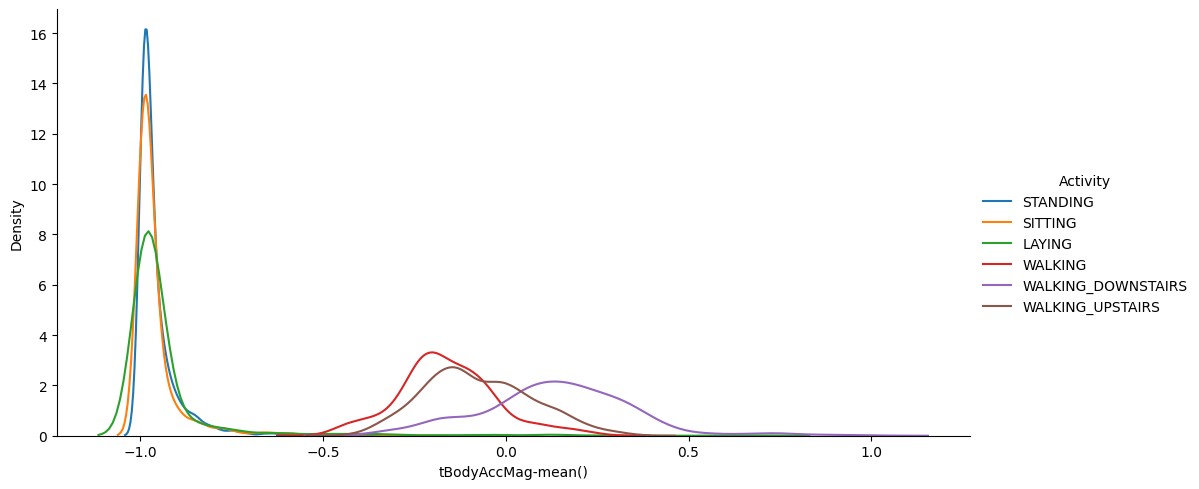

In [12]:

facetgrid=sns.FacetGrid(train,hue='Activity',height=5,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()',hist=False).add_legend()


<AxesSubplot:xlabel='Activity', ylabel='tBodyAccMag-mean()'>

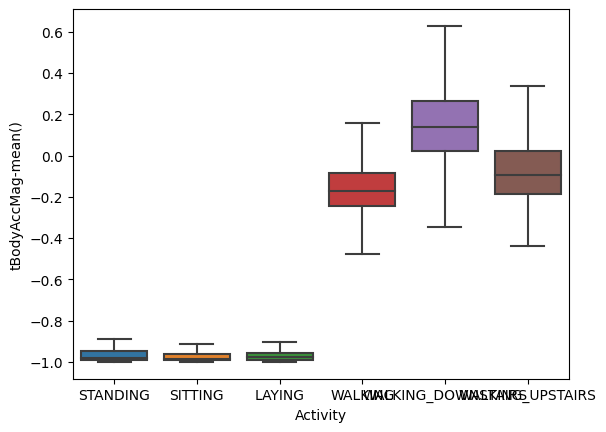

In [13]:
sns.boxplot(x='Activity',y='tBodyAccMag-mean()',data=train,showfliers=False)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

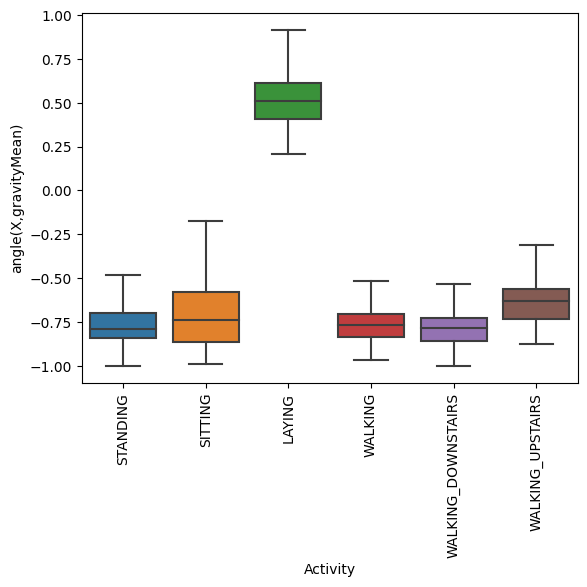

In [16]:
sns.boxplot(x='Activity',y='angle(X,gravityMean)',data=train,showfliers=False)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

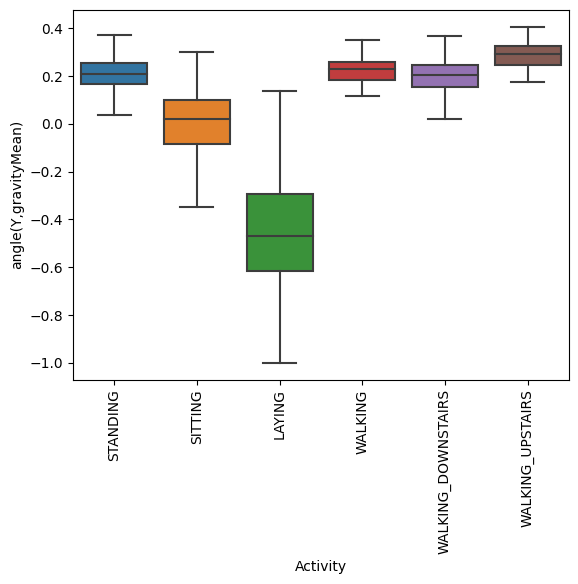

In [18]:
sns.boxplot(x='Activity',y='angle(Y,gravityMean)',data=train,showfliers=False)
plt.xticks(rotation=90)

### Visualizing Data using PCA

Using PCA data can be visualised from a extremely high dimensional space to a low dimensional space and still it remains lots of actual info 

In [20]:
x_pca=train.drop(['subject','Activity'],axis=1)
pca=PCA(n_components=2,random_state=0).fit_transform(x_pca)

In [21]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

<AxesSubplot:>

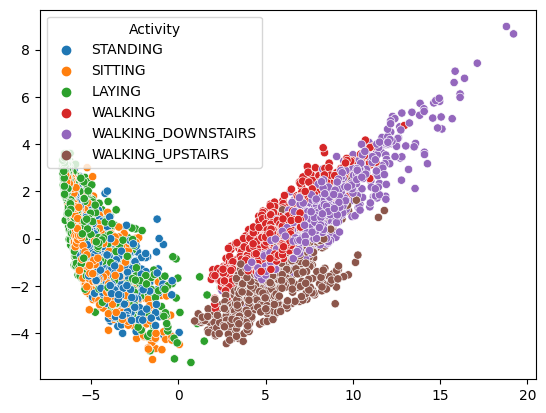

In [22]:
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=train['Activity'])

### Analysing data using tSNE

In [25]:
x_tsne=train.drop(['subject','Activity'],axis=1)
tsne=TSNE(n_components=2,random_state=0).fit_transform(x_tsne)

In [26]:
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

<AxesSubplot:>

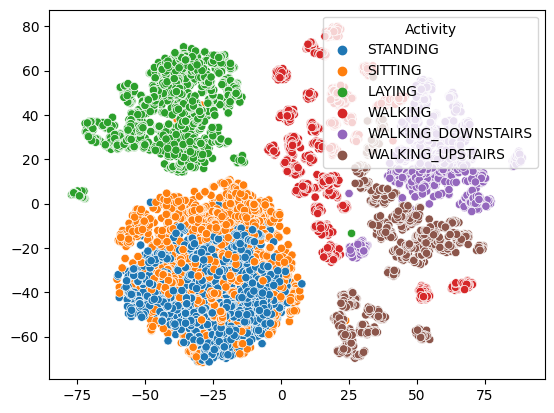

In [27]:
sns.scatterplot(x=tsne[:,0],y=tsne[:,1],hue=train['Activity'])

# ML MODELS

In [29]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [30]:
xtrain=train.drop(['subject','Activity'],axis=1)
ytrain=train['Activity']

xtest=test.drop(['subject','Activity'],axis=1)
ytest=test['Activity']


### LogisticRegression with Hyperparameter and cross validation using randomsearchCV

In [31]:
parameters={'max_iter':[100,200,500]}
lr=LogisticRegression()
lr_rs=RandomizedSearchCV(lr,param_distributions=parameters,cv=5,random_state=42)
lr_rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'max_iter': [100, 200, 500]},
                   random_state=42)

In [33]:
y_pred=lr_rs.predict(xtest)

In [34]:
y_pred

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

In [36]:
lr_accuracy=accuracy_score(y_true=ytest,y_pred=y_pred)
lr_accuracy

0.9613165931455717

### Kernel SVM with Hyperparameter and cross validation using randomsearchCV

In [37]:
parameters={
    'kernel':['linear','rbf','poly','sigmoid'],
    'C':[100,5]
}

svm_rs=RandomizedSearchCV(SVC(),param_distributions=parameters,cv=3,random_state=43)
svm_rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 5],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=43)

In [38]:
ypred=svm_rs.predict(xtest)

In [40]:
kernel_svm_acc=accuracy_score(y_true=ytest,y_pred=ypred)
print(kernel_svm_acc)

0.9623345775364778


### Decision tree with Hyperparameter and cross validation using randomsearchCV


In [44]:
parameters={
    'max_depth':np.arange(2,10,2)
}

dt=DecisionTreeClassifier()
dt_rs=RandomizedSearchCV(dt,param_distributions=parameters,cv=3,random_state=42)
dt_rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [45]:
ypred=dt_rs.predict(xtest)

In [46]:
dt_acc=accuracy_score(y_true=ytest,y_pred=ypred)
print(dt_acc)

0.8096369189005769


### Random Forest with Hyperparameter and cross validation using randomsearchCV

In [48]:
parameters={
    'n_estimators':np.arange(20,101,10),
    'max_depth':np.arange(2,17,2)
}

rf=RandomForestClassifier()
rf_rs=RandomizedSearchCV(rf,param_distributions=parameters,cv=4,random_state=42)
rf_rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [49]:
ypred=rf_rs.predict(xtest)

In [50]:
rf_acc=accuracy_score(y_true=ytest,y_pred=ypred)
print(rf_acc)

0.9209365456396336
